## Import libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from utils import *
from implementations import *
%load_ext autoreload
%autoreload 2

## Load the data

In [2]:
y, X, ids = load_csv_data(path="data/train.csv")
print("Input data shape", X.shape)
print("Labels data shape", y.shape)

Input data shape (250000, 30)
Labels data shape (250000,)


In [3]:
y[np.where(y == -1)] = 0
y

array([1., 0., 0., ..., 1., 0., 0.])

In [4]:
X[X == -999] = 0
# X_sincos = np.c_[np.sin(X), np.cos(X)]

In [5]:
x_tr, x_val, y_tr, y_val = split_data(X, y, 0.8)

print("Training data shapes", x_tr.shape, y_tr.shape)
print("Validation data shapes", x_val.shape, y_val.shape)

Training data shapes (200000, 30) (200000,)
Validation data shapes (50000, 30) (50000,)


In [6]:
x_tr = add_bias_term(standardize(x_tr)[0])
x_val = add_bias_term(standardize(x_val)[0])

print("Training data shapes", x_tr.shape)
print("Validation data shapes", x_val.shape)

Training data shapes (200000, 31)
Validation data shapes (50000, 31)


## Train

In [8]:
weights, loss = reg_logistic_regression(
    y_tr, x_tr, 0, np.zeros(x_tr.shape[1]), max_iters=3000, gamma=0.2)

Iteration 1/3000: loss=0.6931471805599453,gamma=0.2
Iteration 201/3000: loss=0.53870913935921,gamma=0.2
Iteration 401/3000: loss=0.5303734699241227,gamma=0.2
Iteration 601/3000: loss=0.5276059026114104,gamma=0.2
Iteration 801/3000: loss=0.5261822499239371,gamma=0.2
Iteration 1001/3000: loss=0.5252849312901472,gamma=0.2
Iteration 1201/3000: loss=0.5246586509964566,gamma=0.2
Iteration 1401/3000: loss=0.5241956926601379,gamma=0.2
Iteration 1601/3000: loss=0.5238409036836472,gamma=0.2
Iteration 1801/3000: loss=0.5235621562728572,gamma=0.2
Iteration 2001/3000: loss=0.5233389988255386,gamma=0.2
Iteration 2201/3000: loss=0.5231575869310245,gamma=0.2
Iteration 2401/3000: loss=0.5230081395394953,gamma=0.2
Iteration 2601/3000: loss=0.5228835350401067,gamma=0.2
Iteration 2801/3000: loss=0.5227784739121571,gamma=0.2


In [9]:
print("Training score", compute_score(y_tr, x_tr, weights))
print("Validation score", compute_score(y_val, x_val, weights))

Training score 0.74297
Validation score 0.74176


In [10]:
f1_score(y_val, x_val, weights)

0.5533416355334164

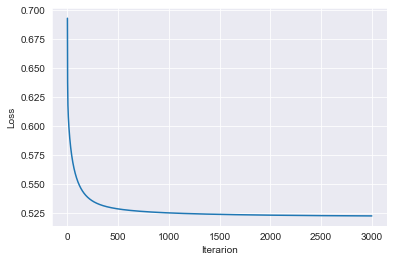

In [11]:
plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Iterarion")
plt.ylabel("Loss")
plt.show()

## Testing

In [ ]:
_, XTest, idsTest = load_csv_data(path="data/test.csv")
XTest[XTest == -999] = 0
print("Input data shape", XTest.shape)
# print("Labels data shape", y.shape)

In [ ]:
XTest = add_bias_term(standardize(XTest)[0])
XTest.shape

In [ ]:
yTest = np.array([predictions(x, weights) for x in XTest])

In [ ]:
yTest[np.where(yTest == 0)] = -1
print(yTest)

In [ ]:
create_csv_submission(idsTest, yTest, "03.csv")

In [ ]:
(yTest==1).sum()/len(yTest)

# Balanced

In [12]:
weights, loss = reg_logistic_regression(
    y_tr, x_tr, 0, np.zeros(x_tr.shape[1]), max_iters=3000, gamma=0.2,balanced=True)
print("Validation score", compute_score(y_val, x_val, weights))
f1_score(y_val, x_val, weights)

Iteration 1/3000: loss=0.312228480193874,gamma=0.2


/Users/alexzhu/PycharmProjects/ml-project-1-zml/utils.py:67: RuntimeWarning: divide by zero encountered in log
  (beta * y * np.log(y_hat) + (1 - beta) * (1 - y) * np.log(1 - y_hat))) + 0.5 * lambda_ * np.linalg.norm(
/Users/alexzhu/PycharmProjects/ml-project-1-zml/utils.py:67: RuntimeWarning: invalid value encountered in multiply
  (beta * y * np.log(y_hat) + (1 - beta) * (1 - y) * np.log(1 - y_hat))) + 0.5 * lambda_ * np.linalg.norm(


Iteration 201/3000: loss=0.2738644153416008,gamma=1
Iteration 401/3000: loss=0.2709587714299194,gamma=0.0625
Iteration 601/3000: loss=0.2723924817607441,gamma=1
Iteration 801/3000: loss=0.26690104943704895,gamma=0.0625
Iteration 1001/3000: loss=0.2695687403594742,gamma=1
Iteration 1201/3000: loss=0.26775833016418854,gamma=1
Iteration 1401/3000: loss=0.26032112147511666,gamma=1
Iteration 1601/3000: loss=0.2613784768871561,gamma=0.046875
Iteration 1801/3000: loss=0.26001729308126326,gamma=1
Iteration 2001/3000: loss=0.26963743481754526,gamma=0.0625
Iteration 2201/3000: loss=0.26064952523667534,gamma=0.0625
Iteration 2401/3000: loss=0.26110856451831493,gamma=1
Iteration 2601/3000: loss=0.27468705045082714,gamma=1
Iteration 2801/3000: loss=0.2690903117299935,gamma=1
Validation score 0.7424


0.5565349125464812